## Parser HCRL CAN Dataset

In [18]:
import pandas as pd
import numpy as np
import re

def parse_hcrl_dataset(filepath):
    """
    Parse HCRL CAN dataset with flexible whitespace
    Format: Timestamp: X.XX ID: XXXX XXX DLC: X [data bytes]
    """
    data = []
    
    print(f"Parsing {filepath}...")
    
    with open(filepath, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f):
            line = line.strip()
            
            if not line:
                continue
            
            try:
                # Extract fields using regex with flexible whitespace (\s+)
                # Timestamp: FLOAT ID: HEX HEX DLC: INT [HEX bytes]
                match = re.match(
                    r'Timestamp:\s+([\d.]+)\s+ID:\s+([0-9a-fA-F]+)\s+(\d+)\s+DLC:\s+(\d+)\s*(.*)',
                    line
                )
                
                if match:
                    timestamp = float(match.group(1))
                    can_id = int(match.group(2), 16)  # Hex to decimal
                    flag = int(match.group(3))
                    dlc = int(match.group(4))
                    data_bytes_str = match.group(5).strip()
                    
                    # Extract data bytes (hex values)
                    if data_bytes_str:
                        data_bytes = [int(b, 16) for b in data_bytes_str.split()]
                    else:
                        data_bytes = []
                    
                    # Pad to 8 bytes with zeros
                    while len(data_bytes) < 8:
                        data_bytes.append(0)
                    
                    # Take only first 8 bytes
                    data_bytes = data_bytes[:8]
                    
                    # Create row: [timestamp, can_id, dlc, data0-7, flag]
                    row = [timestamp, can_id, dlc] + data_bytes + [flag]
                    data.append(row)
                    
            except Exception as e:
                # Skip malformed lines
                if line_num < 5:  # Show first few errors for debugging
                    print(f"  Warning: Could not parse line {line_num}: {e}")
                continue
    
    # Create DataFrame
    columns = ['Timestamp', 'CAN_ID', 'DLC', 
               'Data_bytes_0', 'Data_bytes_1', 'Data_bytes_2', 'Data_bytes_3',
               'Data_bytes_4', 'Data_bytes_5', 'Data_bytes_6', 'Data_bytes_7', 'Flag']
    
    df = pd.DataFrame(data, columns=columns)
    print(f"✓ Parsed {len(df):,} messages")
    
    return df


# Test the parser
data_path = r"C:\Users\noco0\python\CAN-Intrusion Dataset"

print("="*60)
print("TESTING PARSER")
print("="*60)

# Test on attack_free first
attack_free = parse_hcrl_dataset(f'{data_path}\\Attack_free_dataset.txt')

print("\n" + "="*60)
print("SAMPLE DATA")
print("="*60)
print(attack_free.head(10))

print("\n" + "="*60)
print("DATA INFO")
print("="*60)
print(f"Shape: {attack_free.shape}")
print(f"\nData types:")
print(attack_free.dtypes)
print(f"\nSummary statistics:")
print(attack_free.describe())

TESTING PARSER
Parsing C:\Users\noco0\python\CAN-Intrusion Dataset\Attack_free_dataset.txt...
✓ Parsed 2,369,398 messages

SAMPLE DATA
   Timestamp  CAN_ID  DLC  Data_bytes_0  Data_bytes_1  Data_bytes_2  \
0   0.000000     790    8             5            32           234   
1   0.000224     809    8           215           167           127   
2   0.000462     128    8             0            23           234   
3   0.000704     129    8           127           132            96   
4   0.000878     288    4             0             0             0   
5   0.001115     339    8             0           128            16   
6   0.001366     399    8             0            41            32   
7   0.001600     544    8           236             3             2   
8   0.001684     339    0             0             0             0   
9   0.001928     339    8             0           128            16   

   Data_bytes_3  Data_bytes_4  Data_bytes_5  Data_bytes_6  Data_bytes_7  Flag  
0  

In [19]:
import pandas as pd

# The actual path
file_path = r"C:\Users\noco0\python\CAN-Intrusion Dataset"

# Load with full paths
attack_free = pd.read_csv(f'{file_path}\\Attack_free_dataset.txt', sep = ',')
dos_attack = pd.read_csv(f'{file_path}\\DoS_attack_dataset.txt', sep = ',')
fuzzy_attack = pd.read_csv(f'{file_path}\\Fuzzy_attack_dataset.txt', sep = ',')
impersonation = pd.read_csv(f'{file_path}\\Impersonation_attack_dataset.txt', sep = ',')

print(f"Attack-free: {len(attack_free):,} rows")
print(f"DoS: {len(dos_attack):,} rows")
print(f"Fuzzy: {len(fuzzy_attack):,} rows")
print(f"Impersonation: {len(impersonation):,} rows")

Attack-free: 2,369,397 rows
DoS: 656,578 rows
Fuzzy: 591,989 rows
Impersonation: 995,471 rows


In [20]:
# STEP 1: Parse each file separately
attack_free = parse_hcrl_dataset(f'{data_path}\\Attack_free_dataset.txt')      # ✓ Parse first
dos_attack = parse_hcrl_dataset(f'{data_path}\\DoS_attack_dataset.txt')        # ✓ Parse first
fuzzy_attack = parse_hcrl_dataset(f'{data_path}\\Fuzzy_attack_dataset.txt')    # ✓ Parse first
impersonation = parse_hcrl_dataset(f'{data_path}\\Impersonation_attack_dataset.txt')  # ✓ Parse first

# STEP 2: Add labels
attack_free['Label'] = 0
dos_attack['Label'] = 1
fuzzy_attack['Label'] = 2
impersonation['Label'] = 3

# STEP 3: Sample and concatenate (merge)
df_balanced = pd.concat([
    attack_free.sample(n=150000, random_state=42),
    dos_attack.sample(n=150000, random_state=42),
    fuzzy_attack.sample(n=150000, random_state=42),
    impersonation.sample(n=150000, random_state=42)
])

Parsing C:\Users\noco0\python\CAN-Intrusion Dataset\Attack_free_dataset.txt...
✓ Parsed 2,369,398 messages
Parsing C:\Users\noco0\python\CAN-Intrusion Dataset\DoS_attack_dataset.txt...
✓ Parsed 656,579 messages
Parsing C:\Users\noco0\python\CAN-Intrusion Dataset\Fuzzy_attack_dataset.txt...
✓ Parsed 591,988 messages
Parsing C:\Users\noco0\python\CAN-Intrusion Dataset\Impersonation_attack_dataset.txt...
✓ Parsed 995,472 messages


In [21]:
df_balanced.head()

,Timestamp,CAN_ID,DLC,Data_bytes_0,Data_bytes_1,Data_bytes_2,Data_bytes_3,Data_bytes_4,Data_bytes_5,Data_bytes_6,Data_bytes_7,Flag,Label
569521,249.393227,672,8,194,0,100,157,219,12,186,2,0,0
990693,433.812808,1296,8,0,0,0,0,0,0,0,0,0,0
919811,402.776092,544,8,240,3,254,3,12,0,67,16,0,0
267139,116.984873,880,8,255,32,0,128,255,0,0,100,0,0
1041423,456.031394,790,8,5,24,184,9,24,23,0,127,0,0


In [22]:
print(df_balanced.duplicated().sum())

0


## Feature engineering

In [23]:
import numpy as np
import pandas as pd

def engineer_feature(df_balanced):
    print("Feature Engineering")
    print("="*20)

    # -----------------------------
    # 1. Sort + Clean Timestamp
    # -----------------------------
    df_balanced = df_balanced.sort_values(
        ["CAN_ID", "Timestamp"]
    ).reset_index(drop=True)

    df_balanced["Time_Delta"] = (
        df_balanced.groupby("CAN_ID")["Timestamp"]
        .diff()
        .fillna(0)
        .abs()
        .clip(upper=1.0)  # Remove extreme anomalies
    )

    # -----------------------------
    # 2. Message Frequency (clipped)
    # -----------------------------
    # Use np.clip because np.where returns NumPy array
    df_balanced['Message_Freq'] = np.clip(
        np.where(df_balanced['Time_Delta'] > 0, 1.0 / df_balanced['Time_Delta'], 0.0),
        a_min=None,      # no lower bound
        a_max=20000      # upper bound
    )

    # ------------------------------------------------
    # 3. Rolling Time Features
    # ------------------------------------------------
    w = 10
    group = df_balanced.groupby("CAN_ID")["Time_Delta"]

    df_balanced["TimeDelta_Mean"] = group.transform(
        lambda x: x.rolling(w, min_periods=1).mean()
    )

    df_balanced["TimeDelta_Std"] = group.transform(
        lambda x: x.rolling(w, min_periods=1).std().fillna(0)
    )

    df_balanced["TimeDelta_Change"] = group.diff().abs().fillna(0).clip(upper=1.0)

    # -----------------------------------------
    # 4. Payload / Byte-Level Features
    # -----------------------------------------
    byte_cols = [f"Data_bytes_{i}" for i in range(8)]

    df_balanced["Payload_Sum"] = df_balanced[byte_cols].sum(axis=1)
    df_balanced["Payload_Mean"] = df_balanced[byte_cols].mean(axis=1)
    df_balanced["Payload_Std"] = df_balanced[byte_cols].std(axis=1)
    df_balanced["ZeroByte_Count"] = (df_balanced[byte_cols] == 0).sum(axis=1)
    df_balanced["Payload_Var"] = df_balanced[byte_cols].var(axis=1)

    # Entropy (always >= 0)
    def calc_entropy(row):
        row = row.astype(int)
        counts = np.bincount(row, minlength=256)
        counts_nonzero = counts[counts > 0]
        if len(counts_nonzero) == 0:
            return 0.0
        p = counts_nonzero / counts_nonzero.sum()
        return float(-(p * np.log2(p)).sum())

    df_balanced["Payload_Entropy"] = df_balanced[byte_cols].apply(calc_entropy, axis=1)

    # -------------------------------------------------------
    # 5. CAN_ID Behaviour Patterns
    # -------------------------------------------------------
    df_balanced["CAN_ID_Freq"] = df_balanced["CAN_ID"].map(df_balanced["CAN_ID"].value_counts())
    df_balanced["Is_High_Priority"] = (df_balanced["CAN_ID"] < 256).astype(int)
    df_balanced["ID_Change"] = df_balanced["CAN_ID"].diff().fillna(0).abs()

    # -------------------------------------------------
    # 6. DLC Anomaly
    # -------------------------------------------------
    dlc_mode = df_balanced.groupby("CAN_ID")["DLC"].transform(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else 8
    )
    df_balanced["DLC_Anomaly"] = (df_balanced["DLC"] != dlc_mode).astype(int)

    # -------------------------------------------------------
    # 7. Bit-level Features
    # -------------------------------------------------------
    def bitcount(x):
        return sum(bin(int(v)).count("1") for v in x)

    df_balanced["BitCount"] = df_balanced[byte_cols].apply(bitcount, axis=1)

    def bit_entropy(x):
        bits = []
        for v in x:
            bits.extend(list(bin(int(v))[2:].zfill(8)))
        bits = np.array(bits).astype(int)
        p1 = bits.mean()
        p0 = 1 - p1
        if p1 in [0, 1]:
            return 0.0
        return float(-(p1 * np.log2(p1) + p0 * np.log2(p0)))

    df_balanced["Bit_Entropy"] = df_balanced[byte_cols].apply(bit_entropy, axis=1)

    # -----------------------------
    # 8. Restore original timestamp order
    # -----------------------------
    df_balanced = df_balanced.sort_values("Timestamp").reset_index(drop=True)

    return df_balanced

In [24]:
# Usage
df_balanced = engineer_feature(df_balanced)
df_balanced.head()

Feature Engineering


,Timestamp,CAN_ID,DLC,Data_bytes_0,Data_bytes_1,Data_bytes_2,Data_bytes_3,Data_bytes_4,Data_bytes_5,Data_bytes_6,...,Payload_Std,ZeroByte_Count,Payload_Var,Payload_Entropy,CAN_ID_Freq,Is_High_Priority,ID_Change,DLC_Anomaly,BitCount,Bit_Entropy
0,0.000000,544,8,41,197,38,85,106,103,2,...,59.014375,0,3482.696429,3.0,29924,0,47.0,0,29,0.993651
1,0.000224,809,8,215,167,127,140,17,47,0,...,81.211254,1,6595.267857,3.0,20925,0,19.0,0,29,0.993651
2,0.000495,0,8,0,0,0,0,0,0,0,...,0.000000,8,0.000000,-0.0,76569,1,0.0,0,0,0.000000
3,0.001212,688,5,58,255,0,7,44,0,0,...,87.677982,4,7687.428571,2.0,20402,0,16.0,0,18,0.857148
4,0.001484,0,8,0,0,0,0,0,0,0,...,0.000000,8,0.000000,-0.0,76569,1,0.0,0,0,0.000000


In [25]:
df_balanced.dtypes

Timestamp           float64
CAN_ID                int64
DLC                   int64
Data_bytes_0          int64
Data_bytes_1          int64
Data_bytes_2          int64
Data_bytes_3          int64
Data_bytes_4          int64
Data_bytes_5          int64
Data_bytes_6          int64
Data_bytes_7          int64
Flag                  int64
Label                 int64
Time_Delta          float64
Message_Freq        float64
TimeDelta_Mean      float64
TimeDelta_Std       float64
TimeDelta_Change    float64
Payload_Sum           int64
Payload_Mean        float64
Payload_Std         float64
ZeroByte_Count        int64
Payload_Var         float64
Payload_Entropy     float64
CAN_ID_Freq           int64
Is_High_Priority      int64
ID_Change           float64
DLC_Anomaly           int64
BitCount              int64
Bit_Entropy         float64
dtype: object

In [26]:
df_balanced.columns

Index(['Timestamp', 'CAN_ID', 'DLC', 'Data_bytes_0', 'Data_bytes_1',
       'Data_bytes_2', 'Data_bytes_3', 'Data_bytes_4', 'Data_bytes_5',
       'Data_bytes_6', 'Data_bytes_7', 'Flag', 'Label', 'Time_Delta',
       'Message_Freq', 'TimeDelta_Mean', 'TimeDelta_Std', 'TimeDelta_Change',
       'Payload_Sum', 'Payload_Mean', 'Payload_Std', 'ZeroByte_Count',
       'Payload_Var', 'Payload_Entropy', 'CAN_ID_Freq', 'Is_High_Priority',
       'ID_Change', 'DLC_Anomaly', 'BitCount', 'Bit_Entropy'],
      dtype='object')

## Train a lightweight IDS model (XGBOOST)

Feature matrix shape: (600000, 27), Target shape: (600000,)
Class distribution: [150000 150000 150000 150000]

XGBoost Accuracy: 89.13%
              precision    recall  f1-score   support

           0     0.9496    0.8478    0.8958     30000
           1     0.8687    0.8707    0.8697     30000
           2     0.8608    0.8867    0.8736     30000
           3     0.8933    0.9601    0.9255     30000

    accuracy                         0.8913    120000
   macro avg     0.8931    0.8913    0.8911    120000
weighted avg     0.8931    0.8913    0.8911    120000



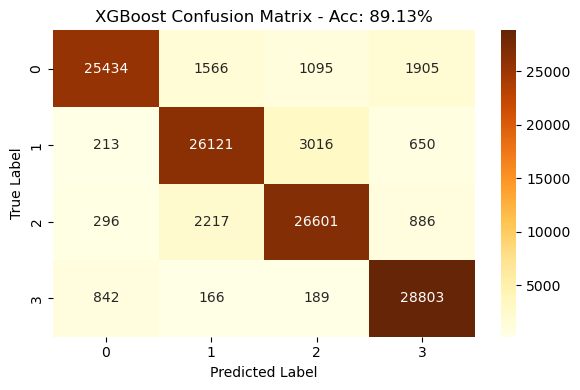

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers, callbacks
import tensorflow as tf

# ==========================
# 1. Feature Selection
# ==========================
# Exclude columns not needed as features
exclude_cols = ['Timestamp', 'Label', 'Flag']  # Target & non-features
feature_cols = [col for col in df_balanced.columns if col not in exclude_cols]

X = df_balanced[feature_cols].values
y = df_balanced['Label'].values

print(f"Feature matrix shape: {X.shape}, Target shape: {y.shape}")
print(f"Class distribution: {np.bincount(y)}")

# ==========================
# 2. Train-Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ==========================
# 3. Standardize float features
# ==========================
# Identify float columns
float_cols = df_balanced[feature_cols].select_dtypes(include=['float64']).columns
float_idx = [feature_cols.index(c) for c in float_cols]

scaler = StandardScaler()
X_train[:, float_idx] = scaler.fit_transform(X_train[:, float_idx])
X_test[:, float_idx] = scaler.transform(X_test[:, float_idx])

# ==========================
# 4. XGBoost Baseline
# ==========================
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model = xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Accuracy: {:.2f}%".format(accuracy_xgb*100))
print(classification_report(y_test, y_pred_xgb, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title(f"XGBoost Confusion Matrix - Acc: {accuracy_xgb*100:.2f}%")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()


TOP 10 MOST IMPORTANT FEATURES


       Feature  Importance
ZeroByte_Count    0.247947
        CAN_ID    0.170954
TimeDelta_Mean    0.081677
   DLC_Anomaly    0.070695
   CAN_ID_Freq    0.048946
      BitCount    0.042682
  Data_bytes_2    0.042336
  Data_bytes_0    0.037503
  Data_bytes_3    0.031790
  Data_bytes_5    0.027462

 Saved: feature_importance_xgboost.png


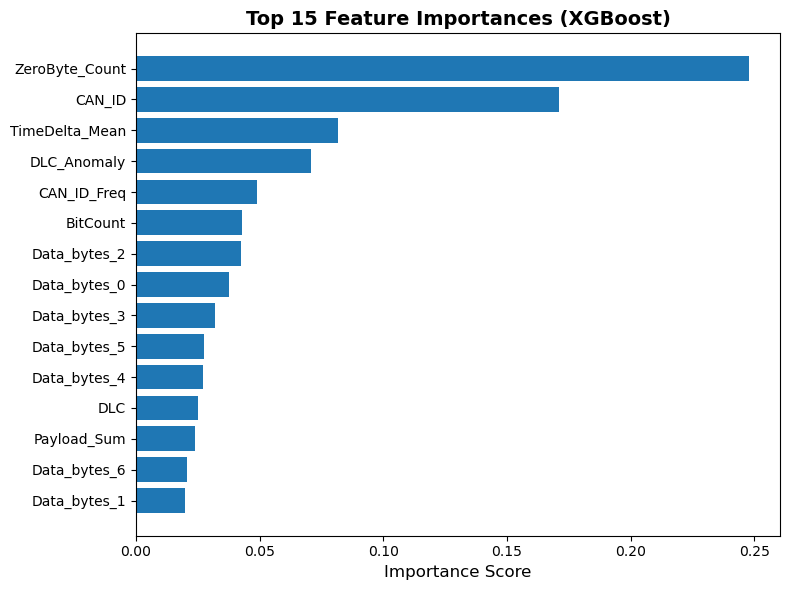

In [28]:
# --------------------- FEATURE IMPORTANCE ---------------------

print("\n" + "="*70)
print("TOP 10 MOST IMPORTANT FEATURES")
print("="*70)

exclude_cols = ['Timestamp', 'Label', 'Flag']
feature_columns = (col for col in df_balanced.columns
                  if col not in exclude_cols)
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n")
print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(8, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'].values)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Feature Importances (XGBoost)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance_xgboost.png', dpi=300, bbox_inches='tight')
print("\n Saved: feature_importance_xgboost.png")
plt.show()


In [29]:
# Reshape features
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],1))

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (480000, 27, 1)
X_test: (120000, 27, 1)


## Featuring Engineering

In [30]:
# https://uniluxembourg.recruitmentplatform.com/apply.html?jobId=PEYFK026203F3VBQB7V7VV4EL-158502&langCode=en_GB&sourceBoard=Academic+Positions+v2&source=Academic+Positions+v2&sType=Academic+Positions+v2&board_id=13431&board_name=Academic+Positions+v2

## Convolution Neural Network Model

Train: (480000, 27, 1)  Test: (120000, 27, 1)


C:\Users\noco0\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 27, 64)              │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 27, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 27, 64)              │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 27, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_6 (MaxPooling1D)       │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 13, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 13, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 13, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 13, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 13, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,476 (474.52 KB)

 Trainable params: 120,708 (471.52 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 102s 61ms/step - accuracy: 0.6493 - loss: 0.8070 - val_accuracy: 0.5717 - val_loss: 1.6348 - learning_rate: 0.0010
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 98s 65ms/step - accuracy: 0.6764 - loss: 0.7411 - val_accuracy: 0.6982 - val_loss: 0.6864 - learning_rate: 0.0010
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 63ms/step - accuracy: 0.7022 - loss: 0.6797 - val_accuracy: 0.7140 - val_loss: 0.6577 - learning_rate: 0.0010
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 97s 65ms/step - accuracy: 0.7224 - loss: 0.6271 - val_accuracy: 0.7066 - val_loss: 0.6711 - learning_rate: 0.0010
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 146s 67ms/step - accuracy: 0.7402 - loss: 0.5828 - val_accuracy: 0.7596 - val_loss: 0.5196 - learning_rate: 0.0010
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 95s 63ms/step - accuracy: 0.7515 - loss: 0.5545 - val_accuracy: 0.7608 - val_loss: 0.5282 - learning_rate: 0.0010
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 141s 63ms/step - acc

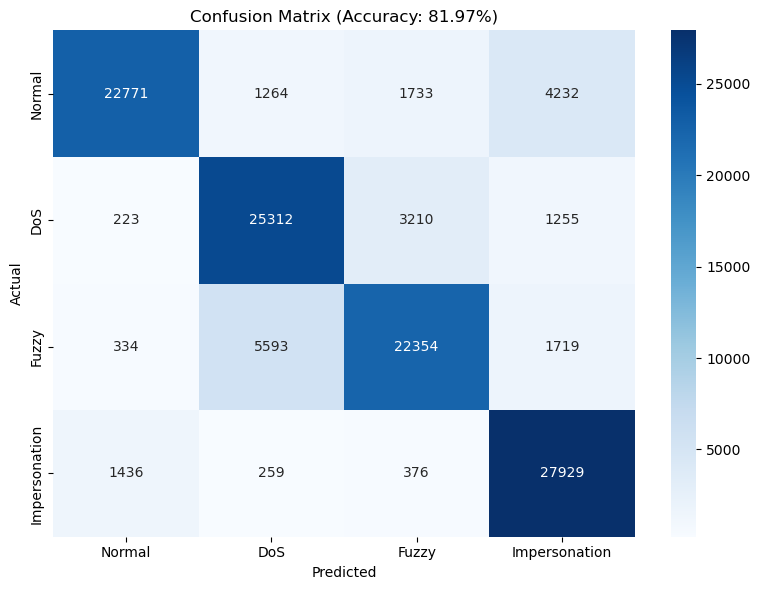

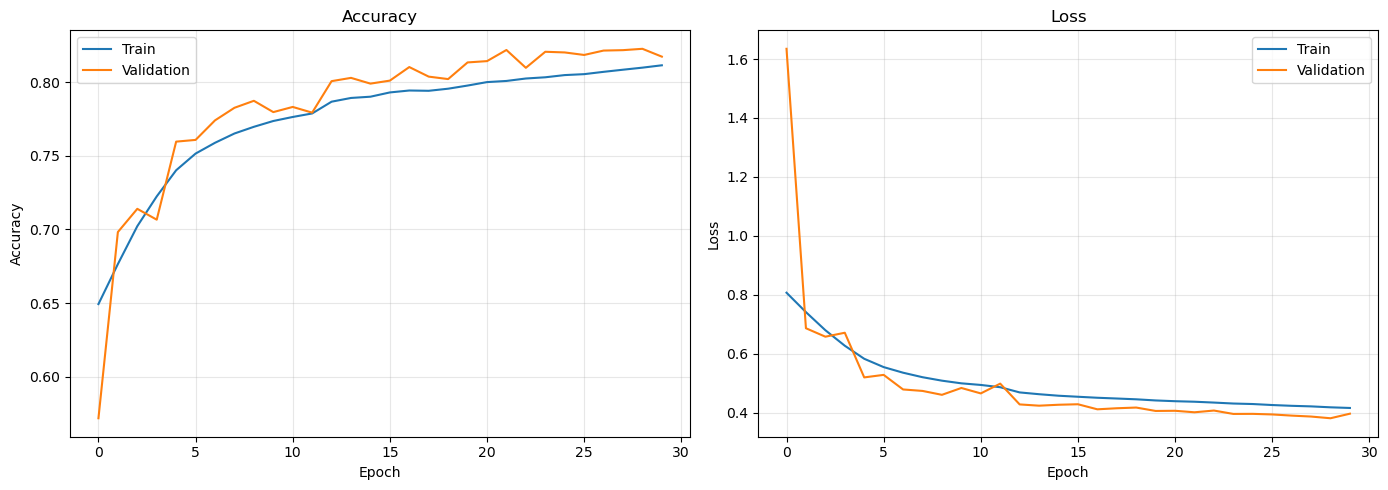

(0.85, 1.0)

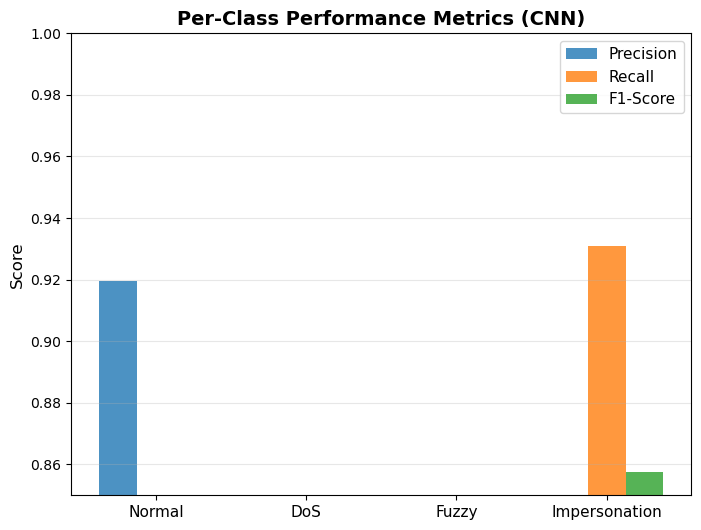

In [36]:
from tensorflow.keras import models, layers, callbacks, regularizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------------------------------------------
# 1. RESHAPE INPUT FOR CNN
# ---------------------------------------------------------------
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn  = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("Train:", X_train_cnn.shape, " Test:", X_test_cnn.shape)

# ---------------------------------------------------------------
# 2. BUILD IMPROVED CNN MODEL
# ---------------------------------------------------------------
model = models.Sequential([
    layers.Conv1D(64, 5, activation='relu', padding='same',
                  input_shape=(X_train_cnn.shape[1], 1)),
    layers.BatchNormalization(),
    layers.Conv1D(64, 5, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),

    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv1D(128, 3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling1D(2),
    layers.Dropout(0.3),

    layers.GlobalAveragePooling1D(),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.3),

    layers.Dense(4, activation='softmax')
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ---------------------------------------------------------------
# 3. CALLBACKS
# ---------------------------------------------------------------
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

# ---------------------------------------------------------------
# 4. TRAINING
# ---------------------------------------------------------------
history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)


# ---------------------------------------------------------------
# 5. PREDICTION + METRICS
# ---------------------------------------------------------------
y_pred_proba = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_proba, axis=1)


# Per-class metrics
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred, average=None
)

class_names = ["Normal", "DoS", "Fuzzy", "Impersonation"]

print("\nPER-CLASS PERFORMANCE:")
print("-"*70)
for i, name in enumerate(class_names):
    print(f"{name:15s} | Precision: {precision[i]:.4f} | Recall: {recall[i]:.4f} | "
          f"F1: {f1[i]:.4f} | Support: {support[i]:,}")
print("-"*70)

accuracy_cnn = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy_cnn*100:.2f}%\n")

print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

# ---------------------------------------------------------------
# 6. CONFUSION MATRIX PLOT
# ---------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_cnn*100:.2f}%)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 7. TRAINING CURVES
# ---------------------------------------------------------------
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


# 3. Per-class performance
x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
bars2 = ax.bar(x, recall, width, label='Recall', alpha=0.8)
bars3 = ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Performance Metrics (CNN)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylim([0.85, 1.0])

## LSTM Model 

  Creating sequences of length 10...
    Processed 100,000 sequences...
    Processed 200,000 sequences...
    Processed 300,000 sequences...
    Processed 400,000 sequences...
    Processed 500,000 sequences...

  Sequence data: (599991, 10, 27)
    - Samples: 599,991
    - Timesteps: 10 (messages per sequence)
    - Features: 27 (features per message)

  Normalizing sequences...
Train: 479,992 sequences | Test: 119,999 sequences

[2/5] Building sequence-based LSTM model...

Model Architecture:


C:\Users\noco0\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Sequence_LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm1 (LSTM)                         │ (None, 10, 128)             │          79,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm2 (LSTM)                         │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense1 (Dense)                       │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 146,628 (572.77 KB)

 Trainable params: 146,372 (571.77 KB)

 Non-trainable params: 256 (1.00 KB)


  Input shape: (None, 10, 27)

  LSTM processes 10 consecutive messages!

[3/5] Training sequence-based LSTM...
Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.7851 - loss: 0.4565 - val_accuracy: 0.8060 - val_loss: 0.3759 - learning_rate: 0.0010
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 113s 75ms/step - accuracy: 0.8066 - loss: 0.3796 - val_accuracy: 0.8131 - val_loss: 0.3627 - learning_rate: 0.0010
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 116s 77ms/step - accuracy: 0.8180 - loss: 0.3581 - val_accuracy: 0.8386 - val_loss: 0.3276 - learning_rate: 0.0010
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 121s 81ms/step - accuracy: 0.8367 - loss: 0.3269 - val_accuracy: 0.8557 - val_loss: 0.2913 - learning_rate: 0.0010
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 122s 81ms/step - accuracy: 0.8493 - loss: 0.3000 - val_accuracy: 0.8621 - val_loss: 0.2751 - learning_rate: 0.0010
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 157s 91ms/step - accuracy: 0.8578 - loss: 0.2842 - val_accur


Model saved

[4/5] Evaluating...

SEQUENCE-BASED LSTM RESULTS

               precision    recall  f1-score   support

       Normal     0.9695    0.8933    0.9298     30000
          DoS     0.8414    0.8975    0.8685     29999
        Fuzzy     0.8690    0.8793    0.8741     30000
Impersonation     0.9999    0.9999    0.9999     30000

     accuracy                         0.9175    119999
    macro avg     0.9199    0.9175    0.9181    119999
 weighted avg     0.9199    0.9175    0.9181    119999


ACCURACY: 91.75%


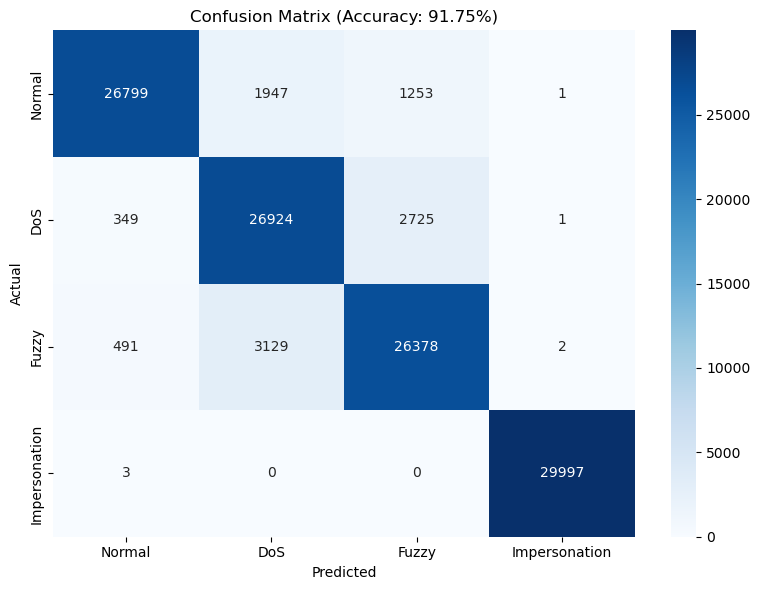

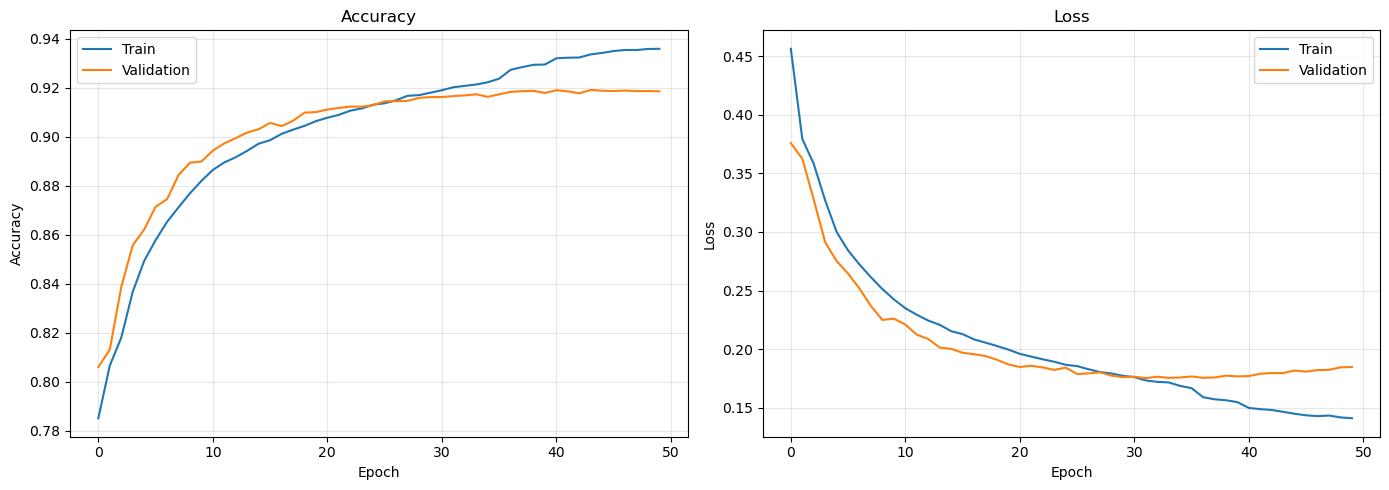

(0.85, 1.0)

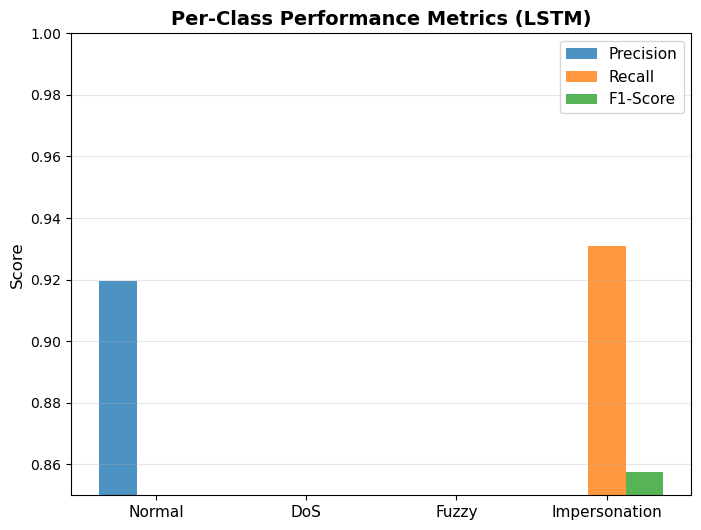

In [37]:
from tensorflow import keras

SEQ_LEN = 30  # recommended

def create_sequences(X, y, sequence_length=10):
    """Create overlapping sequences of messages"""
    X_sequences = []
    y_sequences = []
    
    print(f"  Creating sequences of length {sequence_length}...")
    
    for i in range(len(X) - sequence_length + 1):
        sequence = X[i:i + sequence_length]
        label = y[i + sequence_length - 1]  # Label of last message
        
        X_sequences.append(sequence)
        y_sequences.append(label)
        
        if (i + 1) % 100000 == 0:
            print(f"    Processed {i+1:,} sequences...")
    
    return np.array(X_sequences), np.array(y_sequences)

# Create sequences
sequence_length = 10  # Use last 10 messages to predict current label
X_seq, y_seq = create_sequences(X, y, sequence_length)

print(f"\n  Sequence data: {X_seq.shape}")
print(f"    - Samples: {X_seq.shape[0]:,}")
print(f"    - Timesteps: {X_seq.shape[1]} (messages per sequence)")
print(f"    - Features: {X_seq.shape[2]} (features per message)")

# Split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_seq, y_seq, test_size=0.2, random_state=42, stratify=y_seq
)

# Normalize (reshape to 2D, normalize, reshape back to 3D)
print("\n  Normalizing sequences...")
n_samples_train, n_timesteps, n_features = X_train_1.shape
n_samples_test = X_test_1.shape[0]

X_train_2d = X_train_1.reshape(-1, n_features)
X_test_2d = X_test_1.reshape(-1, n_features)

scaler = StandardScaler()
X_train_2d = scaler.fit_transform(X_train_2d)
X_test_2d = scaler.transform(X_test_2d)

X_train_1 = X_train_2d.reshape(n_samples_train, n_timesteps, n_features)
X_test_1 = X_test_2d.reshape(n_samples_test, n_timesteps, n_features)

print(f"Train: {X_train_1.shape[0]:,} sequences | Test: {X_test_1.shape[0]:,} sequences")

# --------------------- BUILD SEQUENCE-BASED MODEL ---------------------

print("\n[2/5] Building sequence-based LSTM model...")

model = models.Sequential([
    # LSTM layers that process sequences
    layers.LSTM(128, return_sequences=True, 
               input_shape=(sequence_length, n_features),
               name='lstm1'),
    layers.Dropout(0.3),
    
    layers.LSTM(64, return_sequences=False, name='lstm2'),
    layers.Dropout(0.3),
    
    # Dense classification head
    layers.Dense(128, activation='relu', name='dense1'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu', name='dense2'),
    layers.Dropout(0.4),
    
    layers.Dense(4, activation='softmax', name='output')
], name='Sequence_LSTM')

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
model.summary()

print(f"\n  Input shape: (None, {sequence_length}, {n_features})")
print(f"\n  LSTM processes {sequence_length} consecutive messages!")

# --------------------- TRAIN ---------------------

print("\n[3/5] Training sequence-based LSTM...")

history = model.fit(
    X_train_1, y_train_1,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[
        callbacks.EarlyStopping(monitor='val_accuracy', patience=7, 
                               restore_best_weights=True, verbose=1),
        callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=4, verbose=1)
    ],
    verbose=1
)

model.save('sequence_lstm.h5')
print("\nModel saved")

# --------------------- EVALUATE ---------------------

print("\n[4/5] Evaluating...")

y_pred = np.argmax(model.predict(X_test_1, verbose=0), axis=1)
accuracy_lstm = accuracy_score(y_test_1, y_pred)

class_names = ['Normal', 'DoS', 'Fuzzy', 'Impersonation']

print("\n" + "="*70)
print("SEQUENCE-BASED LSTM RESULTS")
print("="*70)
print("\n" + classification_report(y_test_1, y_pred, target_names=class_names, digits=4))
print(f"\n{'='*70}")
print(f"ACCURACY: {accuracy_lstm*100:.2f}%")
print(f"{'='*70}")

# ---------------------------------------------------------------
# 6. CONFUSION MATRIX PLOT
# ---------------------------------------------------------------
cm = confusion_matrix(y_test_1, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy_lstm*100:.2f}%)")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------
# 7. TRAINING CURVES
# ---------------------------------------------------------------
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


# 3. Per-class performance
x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width, precision, width, label='Precision', alpha=0.8)
bars2 = ax.bar(x, recall, width, label='Recall', alpha=0.8)
bars3 = ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Performance Metrics (LSTM)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, fontsize=11)
ax.legend(fontsize=11)
ax.grid(True, axis='y', alpha=0.3)
ax.set_ylim([0.85, 1.0])

## Inference Latency Curve

In [41]:
import os
import numpy as np
from tensorflow.keras.models import load_model
import time

# Load model
model = load_model('sequence_lstm.h5')

# Quick check prediction
model.predict(X_test_1[:10], verbose=0)

# Ensure directory exists
os.makedirs('results', exist_ok=True)

# Measure latency on 1000 random samples
latencies = []
n_samples = 1000
indices = np.random.choice(len(X_test_1), n_samples, replace=False)

for idx in indices:
    sample = X_test_1[idx:idx+1]
    start = time.perf_counter()
    _ = model.predict(sample, verbose=0)
    end = time.perf_counter()
    latencies.append((end - start) * 1000)  # milliseconds

latencies = np.array(latencies)

print(f"\nLSTM Inference Latency ({n_samples} samples):")
print(f"Mean: {np.mean(latencies):.2f} ms")
print(f"Std : {np.std(latencies):.2f} ms")
print(f"Max : {np.max(latencies):.2f} ms")
print(f"99th percentile: {np.percentile(latencies, 99):.2f} ms")

# Save for plotting
np.save('results/lstm_latencies.npy', latencies)


LSTM Inference Latency (1000 samples):
Mean: 160.54 ms
Std : 28.99 ms
Max : 768.78 ms
99th percentile: 220.24 ms


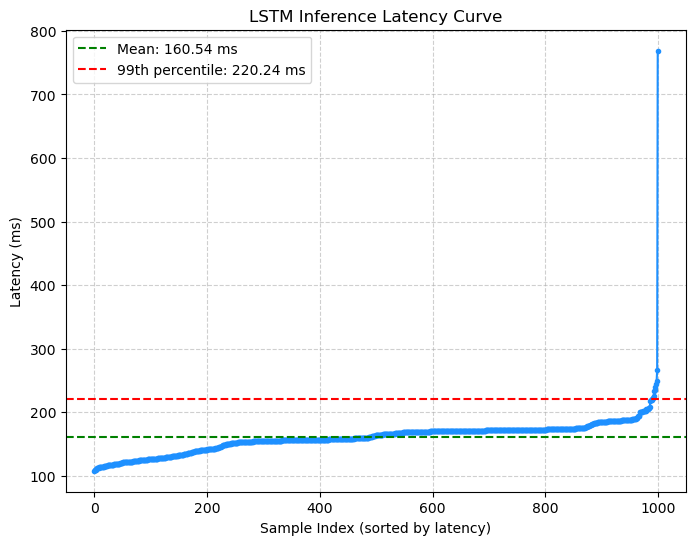

In [45]:
import numpy as np

latencies = np.load('results/lstm_latencies.npy')

latencies_sorted = np.sort(latencies)

plt.figure(figsize = (8,6))
plt.plot(latencies_sorted, marker = '.', 
         linestyle = '-', color = 'dodgerblue')
plt.title('LSTM Inference Latency Curve')
plt.xlabel('Sample Index (sorted by latency)')
plt.ylabel('Latency (ms)')
plt.grid(True, linestyle='--', alpha=0.6)

# Highlight mean and 99th percentile
mean_latency = np.mean(latencies)
p99_latency = np.percentile(latencies, 99)
plt.axhline(mean_latency, color='green', linestyle='--', label=f'Mean: {mean_latency:.2f} ms')
plt.axhline(p99_latency, color='red', linestyle='--', label=f'99th percentile: {p99_latency:.2f} ms')
plt.legend()

plt.show()

In [43]:
print(latencies)

[768.77690002 169.66469999 152.71610001 131.8649     173.53520001
 244.37599999 155.31       248.7199     171.0041     172.26009999
 205.73870002 155.67040001 168.20779999 179.79660002 149.90449999
 155.8753     170.6936     140.8618     156.1236     124.16919999
 154.1326     121.57629998 157.01739999 149.21610002 181.61890001
 165.93829999 165.55860001 165.34169999 170.4417     202.3566
 122.72780002 160.56650001 170.32480001 156.0473     172.22750001
 156.93219999 173.41420002 171.9627     172.33050001 171.9933
 171.97       170.77590001 171.29279999 157.29159999 170.34370001
 156.17609999 172.39280001 170.61259999 156.03780001 156.8915
 173.79610002 169.28939999 205.17060001 173.96489999 172.77129999
 158.8647     155.18160001 194.72249999 180.57319999 157.87529998
 184.9436     155.46030001 171.08920001 171.3328     155.5467
 173.4534     199.66419999 189.6936     169.66089999 172.25419998
 126.12910001 167.1935     159.01850001 171.99909998 155.7842
 155.18180002 189.1284     123

In [ ]:
plt.figure(figsize = (6, 4))
accuracy = (accuracy_score(y_test_1, y_pred))
print(accuracy)
plt.show()